# 1. 2회차 리뷰
 - weatherAUS.csv를 읽으세요
 - 결측치를 적절하게 처리해보세요.
 - 파티셔닝을 수행하세요(8:2)
 - 파티셔닝된 결과에 대해 각각 scaling을 적용하세요
 - Yes를 Y로, No를 N으로 replace 하세요

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

# 수치형과 범주형으로 데이터를 분리

In [9]:
# 수치형
num_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
data_num = data[ num_columns ]

In [10]:
print(data_num.isnull().mean())

MinTemp          0.009165
MaxTemp          0.006562
Rainfall         0.016974
Evaporation      0.348309
Sunshine         0.367777
WindGustSpeed    0.091131
WindSpeed9am     0.017950
WindSpeed3pm     0.017516
Humidity9am      0.015455
Humidity3pm      0.013855
Pressure9am      0.096852
Pressure3pm      0.096310
Cloud9am         0.338928
Cloud3pm         0.351997
Temp9am          0.013205
Temp3pm          0.012039
RISK_MM          0.016811
dtype: float64


In [27]:
imputer = SimpleImputer(strategy='median')
imputer.fit(data_num)
print(imputer.statistics_)
data_num = imputer.transform(data_num)
data_num_df = pd.DataFrame(data_num, columns=num_columns)
print(data_num_df.isnull().mean())

[  12.1   22.3    0.     4.6    8.4   39.    13.    19.    70.    53.
 1017.3 1015.     5.     5.    16.6   20.9    0. ]
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RISK_MM          0.0
dtype: float64


In [30]:
# 범주형
cat_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
data_cat = data[cat_columns]

In [110]:
#################################################################################
#Datetime
import datetime
import time

dt = pd.to_datetime(data['Date'])
dt.dt.date
dt.dt.time


0        00:00:00
1        00:00:00
2        00:00:00
3        00:00:00
4        00:00:00
           ...   
36876    00:00:00
36877    00:00:00
36878    00:00:00
36879    00:00:00
36880    00:00:00
Name: Date, Length: 36881, dtype: object

In [31]:
print(data_cat.isnull().mean())

Location        0.000000
WindGustDir     0.091321
WindDir9am      0.076164
WindDir3pm      0.026084
RainToday       0.016974
RainTomorrow    0.016811
dtype: float64


In [32]:
imputer = SimpleImputer(strategy='most_frequent') 
imputer.fit(data_cat) 
print(imputer.statistics_)
data_cat = imputer.transform(data_cat) 
data_cat_df = pd.DataFrame(data_cat, columns=cat_columns)
print(data_num_df.isnull().mean())

['Canberra' 'SE' 'N' 'SE' 'No' 'No']
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RISK_MM          0.0
dtype: float64


#  탐색

In [77]:
df = pd.concat( [ data_num_df, data_cat_df], axis=1)

(36881, 23)

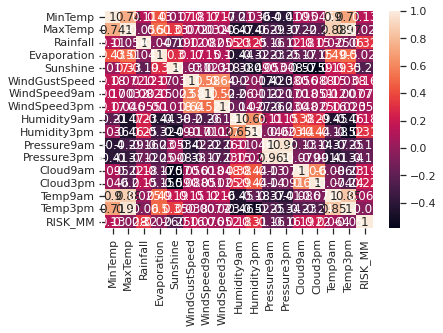

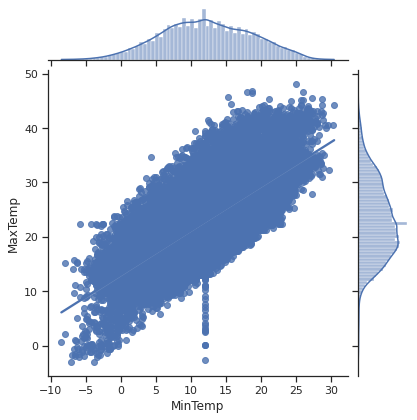

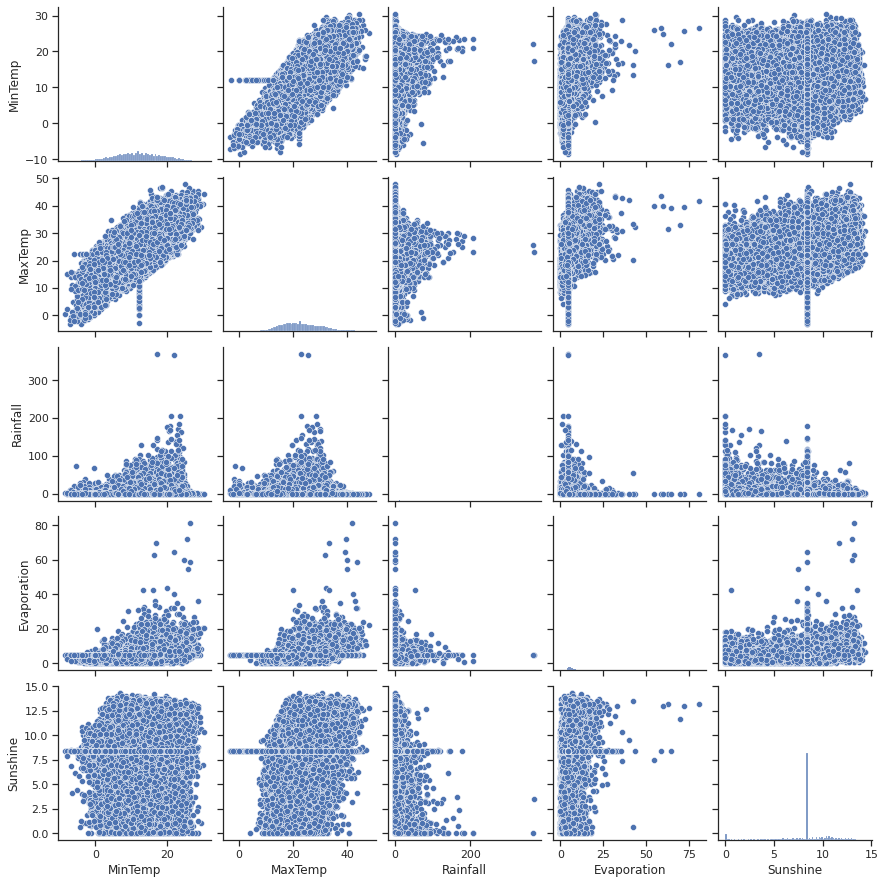

In [33]:
import seaborn as sns

#heatmap+pandas
df.style.background_gradient(cmap='summer')

#heatmap+corr
corr=df.corr()
corr
sns.heatmap(corr, annot=True)

#jointplot
sns.jointplot(x="MinTemp", y="MaxTemp", data=df, kind="reg");
plt.savefig('join3.png')


#pair plot
sns.set(style="ticks")
sns.pairplot(data_num_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']])
plt.show()

#  데이터를 Training과 Testing으로 8:2로 파티셔닝


In [120]:
df.replace(["Yes", "No"], [1, 0], inplace=True)

In [121]:
X_train, X_test = train_test_split(df, test_size=0.2)
train_index = X_train.index
test_index = X_test.index

# Data Scaling 수행

In [122]:
scaler = MinMaxScaler()
scaler.fit(X_train[ num_columns])
X_train_scaled = scaler.transform(X_train[ num_columns])
X_test_scaled = scaler.transform(X_test[ num_columns])

In [123]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns =num_columns, index=train_index)
print(X_train_scaled_df.index)
print(X_train[cat_columns].index)

data_train = pd.concat([X_train_scaled_df,X_train[cat_columns]],axis=1)
data_train.head()

Int64Index([14135, 11002, 32100, 11494, 11444, 20914,  8562,   152, 20081,
            31397,
            ...
            20925,  8209,  2700, 15891, 32652,  3466,  8678, 36065,  2559,
             9965],
           dtype='int64', length=29504)
Int64Index([14135, 11002, 32100, 11494, 11444, 20914,  8562,   152, 20081,
            31397,
            ...
            20925,  8209,  2700, 15891, 32652,  3466,  8678, 36065,  2559,
             9965],
           dtype='int64', length=29504)


MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
14135  0.517949  0.442886  0.044205     0.093596  0.741259       0.492188   
11002  0.710256  0.683367  0.000000     0.093596  0.916084       0.250000   
32100  0.766667  0.711423  0.000000     0.110837  0.825175       0.320312   
11494  0.592308  0.719439  0.000000     0.057882  0.587413       0.187500   
11444  0.487179  0.494990  0.000000     0.034483  0.713287       0.187500   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud3pm  \
14135      0.379310      0.356322     0.551020     0.373737  ...     0.250   
11002      0.126437      0.275862     0.540816     0.717172  ...     0.125   
32100      0.402299      0.298851     0.581633     0.383838  ...     0.750   
11494      0.000000      0.068966     0.846939     0.434343  ...     0.625   
11444      0.149425      0.218391     0.734694     0.656566  ...     0.750   

        Temp9am   Temp3pm   RISK_MM  Location  WindGustDir  WindDir9am  \
14135  0.468677  0.431727  0.000000    Hobart          SSW         SSW   
11002  0.751740  0.584337  0.000544    Albany           SE         ENE   
32100  0.726218  0.698795  0.000000     Moree          NNE         NNE   
11494  0.531323  0.710843  0.000000  Richmond           SW           N   
11444  0.503480  0.441767  0.000000    Hobart           SE         ESE   

      WindDir3pm RainToday RainTomorrow  
14135        SSE         1            0  
11002        ESE         0            0  
32100        NNE         0            0  
11494        NNE         0            0  
11444         SE         0            0  

[5 rows x 23 columns]

In [124]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_columns, index=test_index)
data_test = pd.concat([X_test_scaled_df,X_test[cat_columns]],axis=1)
data_test.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
4231   0.353846  0.378758  0.000000     0.027094  0.587413       0.187500   
18904  0.697436  0.693387  0.000000     0.128079  0.916084       0.148438   
8480   0.674359  0.583166  0.092722     0.056650  0.594406       0.101562   
22683  0.728205  0.679359  0.000000     0.102217  0.559441       0.234375   
9842   0.600000  0.669339  0.000000     0.091133  0.762238       0.203125   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud3pm  \
4231       0.080460      0.229885     0.622449     0.434343  ...     0.625   
18904      0.103448      0.149425     0.540816     0.494949  ...     0.125   
8480       0.045977      0.126437     0.795918     0.646465  ...     0.375   
22683      0.229885      0.275862     0.581633     0.555556  ...     0.750   
9842       0.172414      0.126437     0.173469     0.111111  ...     0.125   

        Temp9am   Temp3pm   RISK_MM  Location  WindGustDir  WindDir9am  \
4231   0.361949  0.373494  0.000000     Cobar          WNW         WSW   
18904  0.721578  0.658635  0.000000  Brisbane          ENE         WSW   
8480   0.612529  0.570281  0.000000  Brisbane          ENE         WSW   
22683  0.749420  0.644578  0.001632    Cairns          ENE         SSE   
9842   0.642691  0.670683  0.000000   Woomera            S         ESE   

      WindDir3pm RainToday RainTomorrow  
4231           W         0            0  
18904          E         0            0  
8480         ENE         1            0  
22683          E         0            0  
9842          SW         0            0  

[5 rows x 23 columns]

In [129]:
X_train = data_train.drop(labels=['RainTomorrow', 'RainToday', 'RISK_MM'], axis=1)
y_train = data_train['RainTomorrow']

X_test = data_test.drop(labels=['RainTomorrow', 'RainToday', 'RISK_MM'], axis=1)
y_test = data_test['RainTomorrow']

In [144]:
from sklearn.tree import DecisionTreeClassifier
num_columns.pop()  #RISK_MM 제거
dt = DecisionTreeClassifier()
dt.fit(X_train[num_columns], y_train)

DecisionTreeClassifier()

In [148]:
np.mean( dt.predict( X_test[num_columns] ) == y_test )

0.7733496001084451

# Upsampling 연습
 - 2회차 자료 중 creditset2.csv를 읽어서 연습

In [152]:
from imblearn.over_sampling import SMOTE

credit= pd.read_csv("creditset2.csv")
credit['default10yr'].value_counts()


0    1717
1     283
Name: default10yr, dtype: int64

In [155]:
print( credit.isnull().mean() )
print( credit.describe().transpose() )


income         0.0
age            0.0
loan           0.0
default10yr    0.0
dtype: float64
              count          mean           std           min           25%  \
income       2000.0  45331.600018  14326.327119  20014.489470  32796.459720   
age          2000.0     40.927143     13.262450     18.055189     29.062492   
loan         2000.0   4444.369695   3045.410024      1.377630   1939.708847   
default10yr  2000.0      0.141500      0.348624      0.000000      0.000000   

                      50%           75%           max  
income       45789.117310  57791.281670  69995.685580  
age             41.382673     52.596993     63.971796  
loan          3974.719418   6432.410625  13766.051240  
default10yr      0.000000      0.000000      1.000000  


             income   age  loan
default10yr                    
0              1717  1717  1717
1               283   283   283


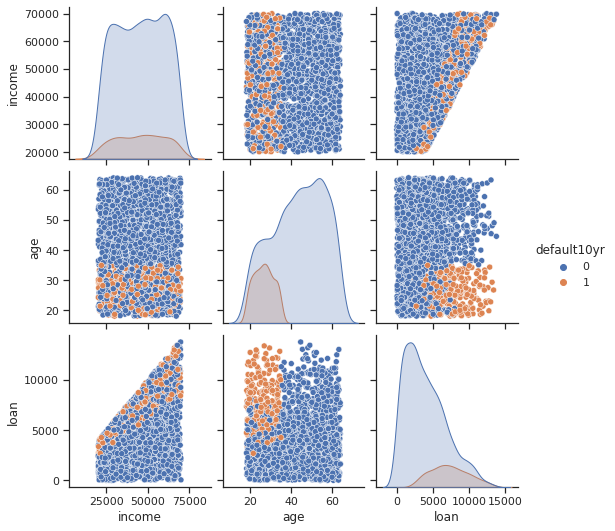

In [157]:
print( credit.groupby(["default10yr"]).count() )
sns.pairplot(credit , hue='default10yr' , diag_kind = 'kde')

In [158]:
array = credit.values
X = array[:,0:3] 
Y = array[:,3]   
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#SMOTE for upsampling smaller cases
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #sampling strategy: 1:1로 업샘플링
#Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))
print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Before UpSampling, counts of label '1': 203
Before UpSampling, counts of label '0': 1197 

After UpSampling, counts of label '1': 1197
After UpSampling, counts of label '0': 1197 

After UpSampling, the shape of train_X: (2394, 3)
After UpSampling, the shape of train_y: (2394,) 



#2.폴더 및 파일 처리 + 이미지 데이터의 처리

In [ ]:
# 폴더와 파일 처리
import os
print(os.path.join('usr', 'bin', 'spam'))

myfiles = ['accounts.txt', 'details.csv', 'invite.docs']
for filename in myfiles:
	print(os.path.join('C:\\users\\test', filename))


usr/bin/spam
C:\users\test/accounts.txt
C:\users\test/details.csv
C:\users\test/invite.docs


In [ ]:
os.getcwd()
os.chdir('/content/data/')
os.getcwd()


'/content/data'

In [ ]:
os.makedirs('test')


In [ ]:
os.path.abspath('.')
os.path.abspath('./test')
os.path.isabs('.')
os.path.isabs(os.path.abspath('.'))
os.listdir('test')

['data_3.csv', 'data.csv']

In [ ]:
#------------------------------------------------------#
#폴더 만들기

#-----------------------------------------------------#
#1. content의 sample_data를 working directory로 지정하세요
os.chdir('/content/sample_data')
#2. sample_data의 파일들을 files라는 리스트로 만드세요
files = os.listdir()
#4. content의 data를 다시 working directory로 지정하세요.
os.chdir('/content/data')

In [ ]:
#------------------------------------------------------#
#파일 복사 및 이동
import shutil	#shell util
shutil.copy('guests.txt', 'test/test1.txt')
#shutil.copytree('../sample_data', 'test_backup')
#moving&renaming
shutil.move('test_backup', 'test_backup2')

'test_backup2'

In [ ]:
#deleting
for filename in os.listdir():
	if filename.endswith('.rxt'):
		#os.unlink(filename)
		print(filename)

#------------------------------------------------------#
#휴지통
import send2trash
baconfile = open('bacon.txt', 'a')
baconfile.write('test')
baconfile.close()

send2trash.send2trash('bacon.txt')



In [ ]:
# 스프레드시트 다루기

import openpyxl
wb = openpyxl.load_workbook('/content/data/example.xlsx')
wb.get_sheet_names()
sheet = wb.get_sheet_by_name('Sheet1')
sheet
sheet.title


sheet['A1']
sheet['A1'].value
c=sheet['B1']
c.value
str(c.row)
c.column

sheet.cell(row=1, column=2).value

for i in range(1,8,2):
	print(i, sheet.cell(row=i, column=2).value)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  import sys


<Worksheet "Sheet1">

In [ ]:
#import openpyxl, pprint
wb = openpyxl.load_workbook('censuspopdata.xlsx')
sheet = wb.get_sheet_by_name('Population by Census Tract')
countyData = {}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for row in range(2, sheet.max_row+1):
	state=sheet['B'+str(row)].value
	county=sheet['C'+str(row)].value
	pop=sheet['D'+str(row)].value
	countyData.setdefault(state, {})
	countyData[state].setdefault(county, {'tracts':0, 'pop':0})
	countyData[state][county]['tracts'] +=1
	countyData[state][county]['pop'] +=int(pop)

countyData['AK']['Anchorage']['pop']

#weatherAUS_10.xls 파일을 워킹디렉토리에 업로드하세요
#openpyxl로 읽으셔서, 시트이름을 확인하세요
#해당 시트의 G6 셀의 값을 출력해보세요.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  if __name__ == '__main__':


1 Apples
3 Pears
5 Apples
7 Strawberries


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).


291826

In [ ]:
#extracting text from pdf
!pip install PyPDF2

     |████████████████████████████████| 77 kB 2.6 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=25c574b5bc955edc119d9df388e4fa560c4ed5e36a391dc74feb984c723c4a49
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [ ]:
import PyPDF2
pdfFileObj = open('meetingminutes.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages
pageObj = pdfReader.getPage(1)
pageObj.extractText()

' LOUISIANA STATE BOARD OF ELEMENTARY AND SECONDARY EDUCATION\n   MARCH 7, 2014\n  \n The Louisiana Purchase Room\n  Baton Rouge, LA\n   \n \n \nThe Louisiana State Board of Elementary and Secondary Education met in \nregular\n session on\n March 7, 2014\n, in the Louisiana Purcha\nse Room, located in the Claiborne \nBuilding in Baton Rouge, Louisiana.  The meeting was called to order at \n9:17 a.m.\n by \nBoard President \nChas Roemer\n and opened with a prayer by\n Ms. Terry Johnson, Bossier \nParish School System\n.  \nBoard members present were \nDr. Lottie Beebe, Ms. Holly Boffy, Mr. Jim Garvey, Mr.\n Jay \nGuillot, Ms.\n Carolyn Hill, Mr. Walter Lee, \nDr. Judith Miranti, \nMr. Chas Roemer\n, and \nMs. Jane Smith\n.  Ms. Connie Bradford\n and Ms. Kira Orange Jones were\n absent.\n  \nDr. Charlie Michel, Lafourche Parish Sch\nool System,\n led the Pledge of Allegiance.\n  Agenda\n Item 2.\n On motion of Mr. Garvey, seconded by Ms. Boffy, the Board approved the \nagenda, as printed

In [ ]:
import PyPDF2, os
pdfFiles=[]
print(os.listdir('pdf'))
for filename in os.listdir(('pdf')):
	if filename.endswith('.pdf'):
		pdfFiles.append( filename)
pdfFiles

['meetingminutes2.pdf', 'demo.docx', 'meetingminutes.pdf']


['meetingminutes2.pdf', 'meetingminutes.pdf']

In [ ]:
#여러 pdf의 text 추출
pdfWriter = PyPDF2.PdfFileWriter()
fulltext = []

for filename in pdfFiles:
	pdfFileObj = open(os.path.join('./pdf/', filename), 'rb')
	pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
	for pageNum in range(1, pdfReader.numPages):
		pageObj=pdfReader.getPage(pageNum)
		fulltext.append(pageObj.extractText())
		pdfWriter.addPage(pageObj)

fulltext


In [ ]:
#Word
!pip install python-docx 
!pip install pyception

     |████████████████████████████████| 5.6 MB 5.0 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=7439d04bd1e798e39aefd161b71f2e2b23765d4bffbb1f9156ff483faaaeb199
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx
  Created wheel for pyception: filename=pyception-0.1.1-py3-none-any.whl size=2073 sha256=f60cefbf5ecbf78838d14be7557d4aaf8a8769aa0cdb6888668ba87850bd2b50
  Stored in directory: /root/.cache/pip/wheels/4b/b2/e5/73eb57847adddedd63169cc609bab2aa13151c6cb1625a70dc
Successfully built pyception


In [ ]:
import docx
doc = docx.Document('demo.docx')
len(doc.paragraphs)
doc.paragraphs[0].text
doc.paragraphs[1].runs[0].text

def getText(filename):
	doc = docx.Document(filename)
	fullText = []
	for para in doc.paragraphs:
		fullText.append(para.text)
	return '\n'.join(fullText)

getText('demo.docx')





'Document Title\nA plain paragraph with some bold and some italic\nHeading, level 1\nIntense quote\nfirst item in unordered list\nfirst item in ordered list\n\n'

In [ ]:
# JSON 다루기
import json
stringsOfJsonData='{"name":"Zophie","isCat":true,"miceCaught":0, "felineIQ":'None'}'	#decoding error
jsonDataAsPythonValue=json.loads(stringsOfJsonData)
jsonDataAsPythonValue

pythonValue = {"name":"Zophie","isCat":True, "miceCaught":0, "felineIQ":None}
stringsOfJsonData = json.dumps( pythonValue)



In [ ]:
#------------------------------------------------------#
#converting, strptime->string parse time
datetime.datetime.strptime('October 5, 2021', '%B %d, %Y')
#datetime.datetime.strptime('2021/10/5 16:29:00', '%Y/%m/%d %H:%M:%S')
#datetime.datetime.strptime('October of 2021", "%B of %Y")	%B month name
#datetime.datetime.strptime("November of 2010", "%B of %Y")



datetime.datetime(2021, 10, 5, 0, 0)

In [ ]:
#################################################################################
# 필로우를 이용한 이미지 처리: 크롭핑, 리사이즈, 크기 조정 등
import os
from PIL import Image

os.chdir('/content/img')
catIm = Image.open('zophie.png')
catIm.size
width, height = catIm.size
catIm.filename
catIm.format
catIm.save('zophie.jpg')

In [ ]:
#------------------------------------------------------#
#Cropping
croppedIm = catIm.crop( (335,345,565,560))
croppedIm
croppedIm.save('cropped.png')
catCopyIm = catIm.copy()

faceIM = catIm.crop( (335,345, 565, 560))
catCopyIm.paste(faceIM, (0,0))
catCopyIm.paste( faceIM, (400,500))
catCopyIm.save('pasted.png')

In [ ]:
#img 폴더 내의 이미지 파일 이름을 리스트로 생성하세요
#반복문+PIL을 사용하셔서, 각 이미지의 가로세로 크기를 출력해보세요
#대상 이미지들의 크기를 모두 100, 100으로 조정해서 저장하세요.
#저장 하실 때에는 원래 이름 앞에 "resize_"라고 붙여주세요.
os.getcwd()
files=os.listdir()
print(files)
for i in files:
  if i.endswith(".png|.jpg"):
    temp = Image.open(i)
    print(temp.filename,temp.size)
    temp2 = temp.resize( 100, 100)
    temp2.save("resize_"+temp.filename)



['.ipynb_checkpoints', 'qurtersized.png', 'pasted.png', 'zophie.png']


In [ ]:
#------------------------------------------------------#
#Resizing
width, height = catIm.size
quartersizedIm = catIm.resize( (int(width/2), int(height/2)))

quartersizedIm.save('qurtersized.png')
quartersizedIm.size

(408, 544)

In [ ]:
catIm.size
catIm.rotate(10).size

(816, 1088)

In [ ]:
#Rotating and Flipping
catIm.rotate(90).save('rotated90.png')
catIm.transpose(Image.FLIP_LEFT_RIGHT).save('horizontal_flip.png')
catIm.transpose(Image.FLIP_TOP_BOTTOM).save('vertical_flip.png')





In [ ]:
################################################################################
# MNIST 이미지 처리하기
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits = load_digits()
digits.data.shape

digits.data[0].reshape(8,8)

#0~9의 숫자이므로 10개 군집
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape



(10, 64)

In [ ]:
#to image file
from PIL import Image
Image.fromarray(digits.data[0].reshape(8, 8)).save("mnist.tiff")

img =np.random.randint(0,256,(28,28,3), dtype=np.uint8)
pImg=Image.fromarray(img, mode='RGB')
Image.fromarray(img).save("test.jpg")


In [ ]:
#github의 2022_2회차_실습데이터보완.zip를 다운로드 받아서 사용하세요~
#1. data_politics 폴더의 파일들의 이름을 리스트로 만들어보고 
#압축파일을 해제하세요
#filename에 endswith를 사용
os.chdir('/content/politics')
#os.makedirs('DON')
#os.makedirs('DOY')
#os.makedirs('RMY')
#os.makedirs('ROY')
#os.makedirs('DMN')

files = os.listdir()
print(files)
for i in files:
  if i.endswith('DON.txt'):
    shutil.move(i, "DON/"+i)


['553_400151_2668002_ROY.txt', 'DOY', 'ROY', '553_400059_2672033_RMY.txt', '493_400657_2346035_DOY.txt', '553_400071_2672008_RMY.txt', 'RMY', '553_400381_2672047_ROY.txt', '553_400208_2672010_DMN.txt', '553_400387_2672019_DMN.txt', 'DON', '493_400663_2345007_DON.txt', 'DMN', '553_400412_2672020_DON.txt', '553_400151_2668001_RMY.txt']


In [ ]:
#2. keyword_data의 폴더별 파일들을 하나의 새로운 폴더로 이동시키세요. 
#이동 시에는 각 파일명 앞에, 해당 파일이 속해있던 폴더명을 포함해주세요.
#다만, keyword_data 폴더는 자동으로 생성하고, 속하는 파일은 일부만 업로드해보세요~

#참고
os.makedirs("/content/keyword_data")
os.chdir("/content/keyword_data")
for i in ['1', '2', '3', '4']:
  for j in ['1', '2', '3']:
    for q in ['1', '2']:
      os.makedirs('k'+i+'_'+j+'_'+q)


In [ ]:
for i in ['1', '2', '3', '4']:
  for j in ['1', '2', '3']:
    for q in ['1', '2']:
      tmp = 'k'+i+'_'+j+'_'+q
      for t in os.listdir(tmp):
        shutil.move(tmp+"/"+t, "/content/target/"+tmp+"_"+t)
  

In [ ]:

#------------------------------------------------------#
# 시각화
fig, ax = plt.subplots(2, 5, figsize=(8, 3))	#10개의 그림을 2행5열로 표시
centers = kmeans.cluster_centers_.reshape(10, 8, 8)	#10개 숫자, 각 그림 픽셀 (8 by 8)로 shape 변경

#표시
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

#Heatmap그려보기
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, digits.target)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#3. 분류모형 리뷰 및 이미지 데이터에 적용

In [ ]:
#----------------------------------------#
#http://yann.lecun.com/exdb/mnist에 가서 다운로드

import urllib.request as req
import gzip, os, os.path

savepath="./mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"

files=["train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz", "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]

if not os.path.exists(savepath):
	os.mkdir(savepath)

for f in files:
	url=baseurl+"/"+f
	loc = savepath+"/"+f
	print("Download:", url)
	if not os.path.exists(loc):
		req.urlretrieve(url, loc)



for f in files:
	gz_file=savepath+"/"+f
	raw_file=savepath+"/"+f.replace(".gz","")
	print("gzip:", f)
	with gzip.open(gz_file, "rb") as fp:
		body=fp.read()
		with open(raw_file, "wb") as w:
			w.write(body)


In [ ]:
#------------------------------------------------------#
#binary to csv
import struct

#train
#label, image 열기
lbl_f = open("./mnist/train-labels-idx1-ubyte", "rb")
img_f = open("./mnist/train-images-idx3-ubyte", "rb")
csv_f = open("./mnist/train.csv","w", encoding="utf-8")

#header정보
mag, lbl_count = struct.unpack(">II", lbl_f.read(8))	#지정된 바이트를 읽어서 정수로 변환
mag, img_count = struct.unpack(">II", img_f.read(8))
rows, cols = struct.unpack(">II", img_f.read(8))
pixels=rows*cols

#CSV저장
for idx in range(lbl_count):
  if idx>10000:
    break
  label = struct.unpack("B", lbl_f.read(1))[0]
  bdata = img_f.read(pixels)
  sdata = list(map(lambda n: str(n), bdata))
  csv_f.write(str(label)+",")
  csv_f.write(",".join(sdata)+"\r\n")
  if idx < 10:
    s="P2 28 28 255\n"
    s+=" ".join(sdata)
    iname = "./mnist/{0}-{1}-{2}.pgm".format("train", idx, label)
    with open(iname, "w", encoding="utf-8") as f:
      f.write(s)
csv_f.close()
lbl_f.close()
img_f.close()

#------------------------------------------------------#
#test
#label, image 열기
lbl_f = open("./mnist/t10k-labels-idx1-ubyte", "rb")
img_f = open("./mnist/t10k-images-idx3-ubyte", "rb")
csv_f = open("./mnist/t10k.csv","w", encoding="utf-8")

#header정보
mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
mag, img_count = struct.unpack(">II", img_f.read(8))
rows, cols = struct.unpack(">II", img_f.read(8))
pixels=rows*cols

#CSV저장
for idx in range(lbl_count):
  if idx>2500:
    break
  label = struct.unpack("B", lbl_f.read(1))[0]
  bdata = img_f.read(pixels)
  sdata = list(map(lambda n: str(n), bdata))
  csv_f.write(str(label)+",")
  csv_f.write(",".join(sdata)+"\r\n")
  if idx < 10:
    s="P2 28 28 255\n"
    s+=" ".join(sdata)
    iname = "./mnist/{0}-{1}-{2}.pgm".format("t10k", idx, label)
    with open(iname, "w", encoding="utf-8") as f:
      f.write(s)
csv_f.close()
lbl_f.close()
img_f.close()



In [ ]:
#------------------------------------------------------#
#classification 적용
def load_csv(fname):
 labels=[]
 images=[]
 with open(fname, "r") as f:
  for line in f:
   cols = line.split(",")
   if len(cols)<2:continue
   labels.append(int(cols.pop(0)))
   vals=list(map(lambda n:int(n)/256, cols))
   images.append(vals)
 return({"labels":labels, "images":images})

data = load_csv("./mnist/train.csv")
test = load_csv("./mnist/t10k.csv")

from sklearn import svm
clf = svm.SVC()
clf.fit(data["images"], data["labels"] )
predict = clf.predict(test["images"])

#result
from sklearn import metrics
ac_score= metrics.accuracy_score(test["labels"], predict)
ac_score

#전체 데이터에 대해 적용해보기



#4. Caltech101 데이터 처리 및 분류 적용

In [ ]:
#################################################################################
# Caltech101 이미지 데이터 처리
#https://www.vision.caltech.edu/Image_Datasets/Caltech101/Caltech101.html
#압축 해제 후  img(현재 홈 디렉토리) 밑에  101_ObjectCategories 폴더로 업로드하세요 *시간이 많이 소요되서, 필요한 카테고리만 업로드합니다.

from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split

os.chdir("/content/caltech")
#대상 카테고리
caltech_dir="caltech"
categories = ["beaver", "bass", "barrel"]
nb_classes = len(categories)

#image size
image_w=64
image_h=64
pixels = image_w * image_h * 3

#read
X=[]
Y=[]
categories

In [ ]:
os.chdir("/content")
for idx, cat in enumerate( categories):

  #label
  label=[0 for i in range(nb_classes)]
  label[idx]=1

  #image
  image_dir=caltech_dir+"/"+cat
  files = glob.glob(image_dir+"/*.jpg")
  print(image_dir)
  for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data=np.array(img)
    X.append(data)
    Y.append(label)
    if i%10 ==0:
      print(i, "\n", data)
  
X=np.array(X)
Y=np.array(Y)

print(X.shape)

#partition
X_train, X_test, y_train, y_test = train_test_split( X,Y)


#5. 플릭커 API를 통한 이미지 수집 및 라벨링, 분류모형 적용

In [ ]:
#################################################################################
# 플릭커 API를 통한 이미지 수집 및 라벨링 
#www.flickr.com
#Yahoo.com 계정 생성 후에 Flickr API 페이지에 들어가서 생성
#https://www.flickr.com/services/api

#화면 상단의 App 제작 또는 Create APP 클릭->비상업용 키 신청->App 이름 및 설명 입력 후 등록(submit)
#key, secret을 보관
!pip install flickrapi

     |████████████████████████████████| 54 kB 2.1 MB/s 


In [ ]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

key="6bfa70412aa62e9bcc133e106d4b85ad"
secret="ba712990d15368ca"

wait_time=1

#사진 검색 및 저장
savedir="sushi"
if not os.path.exists(savedir):
 os.mkdir(savedir)

#API로 다운로드
flickr = FlickrAPI(key, secret, format="parsed-json")
res=flickr.photos.search( text="스시", per_page=200, media="photos", sort="relevance", safe_search=1, extras="url_q, license")

photos=res['photos']
#pprint(photos)

In [ ]:
#------------------------------------------------------#
try: 
 for i , photo in enumerate(photos['photo']):
  url_q = photo['url_q']
  filepath = savedir+'/'+photo['id']+'.jpg'
  if os.path.exists(filepath):continue
  #print(str(i+1)+":download=", url_q)
  urlretrieve(url_q, filepath)
  time.sleep(wait_time)
except:
 import traceback
 traceback.print_exc()

# 2개 이상의 키워드로 플릭커에서 위의 코드를 이용하셔서 이미지를 수집해보세요.



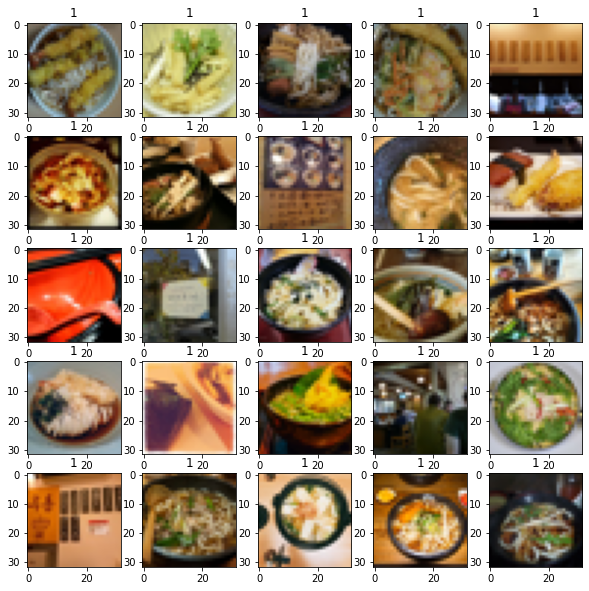

In [ ]:
#flick 사진 처리
import numpy as np
from PIL import Image
import os, glob, random

max_photo = 100
photo_size=32
#x=[]
#y=[]

files = glob.glob( "sushi"+"/*.jpg")
random.shuffle(files)

num=0

for f in files:
 if num >= max_photo: break
 num +=1
 img = Image.open(f)
 img= img.convert("RGB")
 img= img.resize((photo_size, photo_size))
 img= np.asarray(img)
 x.append(img)
 y.append(1)	#label을 0으로 지정


#이미지 출력
import matplotlib.pyplot as plt
idx = 0
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.title(y[i+idx])
 plt.imshow(x[i+idx])
plt.show()



In [ ]:
len(x)

100